In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Gender'].fillna(df.Gender.mode()[0],inplace=True)

In [33]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [34]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [35]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
df.drop('Loan_ID',inplace=True,axis=1)

In [37]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education']=df['Education'].map({'Graduate':0,'Not Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})


In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1


In [38]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=52,train_size=0.8)

In [30]:
print(X_train.shape,' ',X_test.shape,' ',y_train.shape, ' ',y_test.shape)

(491, 11)   (123, 11)   (491,)   (123,)


In [43]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [45]:
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scaler.transform(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [48]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.activations import relu,sigmoid


In [47]:
input_neurons=X_train.shape[1]
hidden_lyr1_n=10
hidden_lyr2_n=5
output_lyr=1

In [49]:
model1=Sequential()
model1.add(InputLayer(input_shape=(input_neurons)))
model1.add(Dense(hidden_lyr1_n,activation=relu))
model1.add(Dense(hidden_lyr2_n,activation=relu))
model1.add(Dense(output_lyr,activation=sigmoid))



In [50]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [51]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist=model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 1.0126 - accuracy: 0.3198 - val_loss: 0.9366 - val_accuracy: 0.3415
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.3340 - val_loss: 0.8272 - val_accuracy: 0.3902
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.4257 - val_loss: 0.7464 - val_accuracy: 0.4390
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.5071 - val_loss: 0.6815 - val_accuracy: 0.5041
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6232 - val_loss: 0.6450 - val_accuracy: 0.6504
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6370 - accuracy: 0.6741 - val_loss: 0.6256 - val_accuracy: 0.7236
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.6986 - val_loss: 0.6126 - val_accuracy: 0.7073
Epoch 8/50
16/16 [=

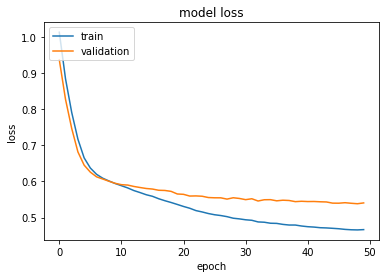

In [70]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

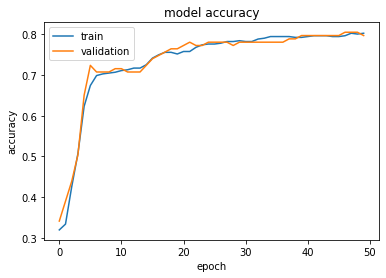

In [74]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()